
Name: Asha Abubakar



#  A Strategic Blueprint for Microsoft's New Movie Studio

## Objective:
### This analysis aims to guide Microsoft's new movie studio by deciphering current box office trends. Through a comprehensive exploration of genres, budgeting strategies, and release date dynamics, we extract actionable insights for informed decision-making.


In [1]:
# importing the necessary modules for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Importing our data
movies_data = pd.read_csv(r'/home/localhost/Documents/pythonn/movies_data.csv')
movies_data

,Unnamed: 0,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross,Genre
0,0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$1,068,879,522",Unknown
1,1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$835,524,642",Unknown
2,2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$756,244,673",Unknown
3,3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$706,102,828",Unknown
4,4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$621,156,389",Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$6,089,100",Unknown
1243,1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,"$13,000,000","$9,633,111",Unknown
1244,1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$648,599",Unknown
1245,1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,427,656",Unknown


In [4]:
# finding the number of rows and columns in the dataset
movies_data.shape

(1247, 12)

In [5]:
# All the information about the dataset(data types, number of colums and rows, etc)
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1247 non-null   int64  
 1   title              1247 non-null   object 
 2   studio             1246 non-null   object 
 3   domestic_gross     1245 non-null   float64
 4   foreign_gross      1086 non-null   object 
 5   year               1247 non-null   int64  
 6   id                 1247 non-null   int64  
 7   release_date       1247 non-null   object 
 8   movie              1247 non-null   object 
 9   production_budget  1247 non-null   object 
 10  worldwide_gross    1247 non-null   object 
 11  Genre              1247 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 117.0+ KB


### Missing values

In [6]:

#finding the missing values in the dataset
movies_data.isna().sum()

Unnamed: 0             0
title                  0
studio                 1
domestic_gross         2
foreign_gross        161
year                   0
id                     0
release_date           0
movie                  0
production_budget      0
worldwide_gross        0
Genre                  0
dtype: int64

In [7]:
# removing the $(dollar sign) so that we can change the datatype for the column to integer

movies_data['worldwide_gross'] = movies_data['worldwide_gross'].replace('[\$,]', '', regex=True).astype(int)
movies_data['production_budget'] = movies_data['production_budget'].replace('[\$,]', '', regex=True).astype(int)
print = movies_data
movies_data

,Unnamed: 0,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross,Genre
0,0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,200000000,1068879522,Unknown
1,1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,160000000,835524642,Unknown
2,2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,165000000,756244673,Unknown
3,3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828,Unknown
4,4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,170000000,621156389,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,10000000,6089100,Unknown
1243,1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,13000000,9633111,Unknown
1244,1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,648599,Unknown
1245,1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,6000000,1427656,Unknown


In [8]:
#changing the datatype for the worldwide_gross column
movies_data['worldwide_gross'] = movies_data['worldwide_gross'].astype(int)
#changing the datatype for the roduction_budget column
movies_data['production_budget'] = movies_data['production_budget'].astype(int)
movies_data

,Unnamed: 0,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross,Genre
0,0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,200000000,1068879522,Unknown
1,1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,160000000,835524642,Unknown
2,2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,165000000,756244673,Unknown
3,3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828,Unknown
4,4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,170000000,621156389,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,10000000,6089100,Unknown
1243,1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,13000000,9633111,Unknown
1244,1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,648599,Unknown
1245,1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,6000000,1427656,Unknown


In [9]:
# renaming worlwide_gross and production_gross columns
movies_data.rename(columns = {'worldwide_gross':'worldwide_gross($)',
                  'production_budget': 'production_budget($)'}, inplace = True)

In [10]:
#replacing all the NaN in foreign_gross with 0
movies_data['foreign_gross'].fillna(movies_data['foreign_gross'])
movies_data.replace('NaN', "0")

,Unnamed: 0,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget($),worldwide_gross($),Genre
0,0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,200000000,1068879522,Unknown
1,1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,160000000,835524642,Unknown
2,2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,165000000,756244673,Unknown
3,3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828,Unknown
4,4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,170000000,621156389,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,10000000,6089100,Unknown
1243,1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,13000000,9633111,Unknown
1244,1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,648599,Unknown
1245,1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,6000000,1427656,Unknown


### conclusion:
No missing values in the dataset

### Duplicated values

In [11]:
#checking for duplicates
movies_data.duplicated().sum()

0

### conclusion
No duplicated data found

# 1. Budget Optimization for Profitability:



### comparison between production_budget and the worldwide_gross

In [12]:
# sorting the data by production budget in descending order 
movies_data_sorted = movies_data.sort_values(by='production_budget($)', ascending=False)[['title', 'production_budget($)', 'worldwide_gross($)']]
movies_data_sorted.head(10)

,title,production_budget($),worldwide_gross($)
185,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
766,Avengers: Age of Ultron,330600000,1403013963
1154,Avengers: Infinity War,300000000,2048134200
1060,Justice League,300000000,655945209
768,Spectre,300000000,879620923
373,John Carter,275000000,282778100
1167,Solo: A Star Wars Story,275000000,393151347
522,The Lone Ranger,275000000,260002115
353,The Dark Knight Rises,275000000,1084439099
5,Tangled,260000000,586477240


In [13]:
# top ten movies with the highest worldwide_gross in descending order

movies_sorted = movies_data.sort_values(by='worldwide_gross($)', ascending=False)[['title', 'production_budget($)', 'worldwide_gross($)']]
movies_sorted.head(10)

,title,production_budget($),worldwide_gross($)
1154,Avengers: Infinity War,300000000,2048134200
764,Jurassic World,215000000,1648854864
765,Furious 7,190000000,1518722794
766,Avengers: Age of Ultron,330600000,1403013963
1155,Black Panther,200000000,1348258224
1156,Jurassic World: Fallen Kingdom,170000000,1305772799
496,Frozen,150000000,1272469910
1157,Incredibles 2,200000000,1242520711
1051,The Fate of the Furious,250000000,1234846267
497,Iron Man 3,200000000,1215392272


## <font color = " blue">Comparing the two tables i.e Worldwide_gross vs production_budget</font>

## Visualization:
### Scatter plot depicting the ROI based on different production budget ranges, emphasizing the profitability of mid-budget films.

<Figure size 1200x800 with 0 Axes>

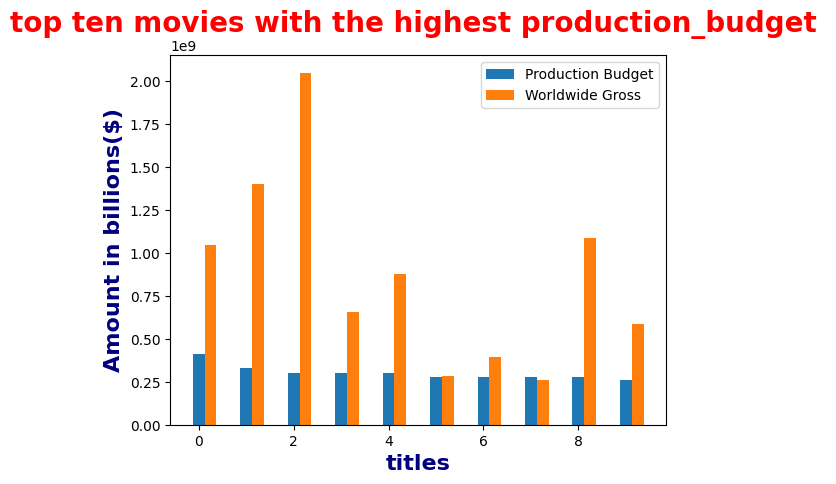

In [14]:
# graph of top ten movies with the highest production_budget
plt.figure(figsize=(12, 8))
movies = movies_data_sorted['title'].head(10)
production_budget = movies_data_sorted['production_budget($)'].head(10)
worldwide_gross = movies_data_sorted['worldwide_gross($)'].head(10)

# plotting bar graphs
fig, ax = plt.subplots()

# set the bar_width
bar_width = 0.25
bar_positions1 = range(len(movies))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

# Plotting bars for production budget
ax.bar(bar_positions1, production_budget, width=bar_width, label='Production Budget')

# Plotting bars for worldwide gross
ax.bar(bar_positions2, worldwide_gross, width=bar_width, label='Worldwide Gross')

# Adding labels and title
plt.title('top ten movies with the highest production_budget ',  fontsize = 20, fontweight = 'bold', color = 'red')
plt.ylabel('Amount in billions($)',  fontsize = 16, fontweight = 'bold', color = 'navy')
ax.set_xlabel('titles', fontsize = 16, fontweight = 'bold', color = 'navy')
plt.legend()# Display legend
plt.show()#Display bar plot

<Figure size 1200x800 with 0 Axes>

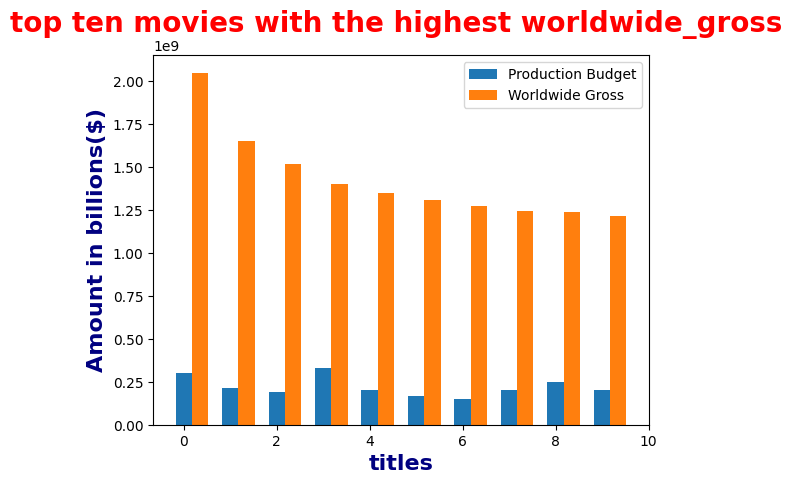

In [15]:
# graph of top ten movies with the highest worldwide_gross
plt.figure(figsize=(12, 8))
movies = movies_sorted['title'].head(10)
production_budget = movies_sorted['production_budget($)'].head(10)
worldwide_gross = movies_sorted['worldwide_gross($)'].head(10)

# plot the bar graphs
fig, ax = plt.subplots()

# setting bar positions
bar_width = 0.35
bar_positions1 = range(len(movies))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

# Plotting bars for production budget
ax.bar(bar_positions1, production_budget, width=bar_width, label='Production Budget')

# Plotting bars for worldwide gross
ax.bar(bar_positions2, worldwide_gross, width=bar_width, label='Worldwide Gross')

# Adding labels and title
plt.title('top ten movies with the highest worldwide_gross ',  fontsize = 20, fontweight = 'bold', color = 'red')
plt.ylabel('Amount in billions($)',  fontsize = 16, fontweight = 'bold', color = 'navy')
ax.set_xlabel('titles', fontsize = 16, fontweight = 'bold', color = 'navy')
#Display legend
plt.legend()
#Display plot
plt.show()

 ## comparing worldwide gross for the two i.e highest production_budget

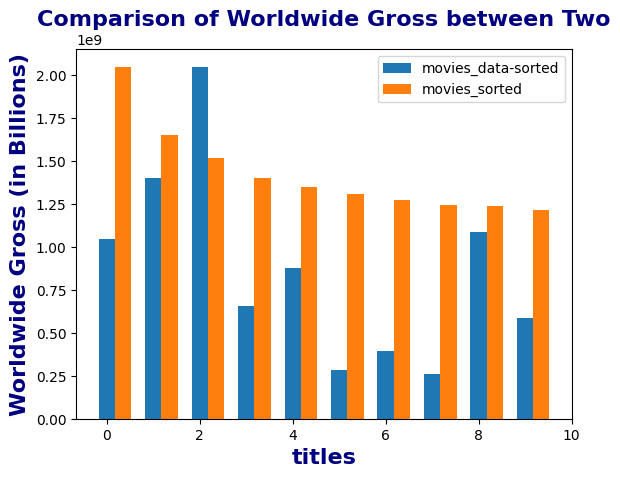

In [16]:
# defining variables for plotting 

#worldwide_gross for highest production budget
movies1 = movies_data_sorted['title'].head(10)
worldwide_gross1 = movies_data_sorted['worldwide_gross($)'].head(10)
# top ten movies with highest worldwide gross
movies2 = movies_sorted['title'].head(10)
worldwide_gross2 = movies_sorted['worldwide_gross($)'].head(10)

#set the bar positions
bar_width = 0.35
bar_positions1 = np.arange(len(movies1))
bar_positions2 = bar_positions1 + bar_width

# plot the bar graph
fig, ax = plt.subplots()


ax.bar(bar_positions1, worldwide_gross1, width=bar_width, label='movies_data-sorted')

ax.bar(bar_positions2, worldwide_gross2, width=bar_width, label='movies_sorted')

# Adding labels and title
ax.set_xlabel('titles',  fontsize = 16, fontweight = 'bold', color = 'navy')
ax.set_ylabel('Worldwide Gross (in Billions)',  fontsize = 16, fontweight = 'bold', color = 'navy')
ax.set_title('Comparison of Worldwide Gross between Two',  fontsize = 16, fontweight = 'bold', color = 'navy')




plt.legend()

# Display the plot
plt.show()

## Insight:
### Analyzing the correlation between production budgets and worldwide gross unveils that mid-budget films exhibit higher Return on Investment (ROI) compared to high-budget productions.



## Recommendation:
### Adopt a balanced budgeting approach, with an emphasis on mid-budget productions, ensuring optimal ROI(Return on investment) and sustainable profitability.



# 2. Strategic Release Date Planning:


In [17]:
#sorting
release = movies_data.sort_values(by='release_date', ascending=False)[['title', 'release_date', 'domestic_gross', 'foreign_gross', 'worldwide_gross($)',]]
release

,title,release_date,domestic_gross,foreign_gross,worldwide_gross($)
997,When the Bough Breaks,"Sep 9, 2016",29700000.0,911000,30768449
936,Sully,"Sep 9, 2016",125100000.0,115700000,238524556
1039,The Disappointments Room,"Sep 9, 2016",2400000.0,NaN,3503761
232,Contagion,"Sep 9, 2011",75700000.0,59800000,137551594
298,Warrior,"Sep 9, 2011",13700000.0,9400000,24215385
...,...,...,...,...,...
344,Super,"Apr 1, 2011",328000.0,NaN,593933
231,Source Code,"Apr 1, 2011",54700000.0,92600000,140428499
245,Insidious,"Apr 1, 2011",54000000.0,43000000,99870886
303,The Last Godfather,"Apr 1, 2011",164000.0,16600000,164247


In [18]:
# splitting month from the release date
month = movies_data['release_date'].str.split(pat=' ', n=0, expand=True)
day_year = month[0].str.split(pat=', ', expand=True)

movies_data['release_month'] = month[0]


movies_data

,Unnamed: 0,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget($),worldwide_gross($),Genre,release_month
0,0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,200000000,1068879522,Unknown,Jun
1,1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,160000000,835524642,Unknown,Jul
2,2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,165000000,756244673,Unknown,May
3,3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828,Unknown,Jun
4,4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,170000000,621156389,Unknown,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,10000000,6089100,Unknown,Jun
1243,1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,13000000,9633111,Unknown,Dec
1244,1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,648599,Unknown,Feb
1245,1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,6000000,1427656,Unknown,Sep


In [20]:
#sorting according to the release month
movies_data['release_month'] = pd.to_datetime(movies_data['release_date']).dt.month
movies_data = movies_data.sort_values(by='release_month')
movies_data = movies_data.drop(columns='release_month')
movies_data

,Unnamed: 0,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget($),worldwide_gross($),Genre
416,416,The Grey,ORF,51600000.0,25700000,2012,95,"Jan 27, 2012",The Grey,25000000,81249176,Unknown
605,605,Broken City,Fox,19700000.0,NaN,2013,11,"Jan 18, 2013",Broken City,35000000,34480045,Unknown
995,995,The Forest,Focus,26600000.0,11000000,2016,92,"Jan 8, 2016",The Forest,10000000,40749230,Unknown
86,86,The Spy Next Door,LGF,24300000.0,20900000,2010,68,"Jan 15, 2010",The Spy Next Door,28000000,46752858,Unknown
714,714,That Awkward Moment,Focus,26100000.0,14400000,2014,78,"Jan 31, 2014",That Awkward Moment,8000000,53068955,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
911,911,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016,45,"Dec 16, 2016",Rogue One: A Star Wars Story,200000000,1049102856,Unknown
835,835,Krampus,Uni.,42700000.0,18800000,2015,28,"Dec 4, 2015",Krampus,15000000,61788393,Unknown
1128,1128,Father Figures,WB,17500000.0,8100000,2017,56,"Dec 22, 2017",Father Figures,25000000,21038441,Unknown
814,814,Joy,Fox,56500000.0,44700000,2015,88,"Dec 25, 2015",Joy,60000000,101134059,Unknown


In [22]:
# release date with the highest worlwide_gross
movies_sorted = movies_data.sort_values(by='worldwide_gross($)', ascending=False)[['title', 'worldwide_gross($)', 'release_date']]
movies_sorted

,title,worldwide_gross($),release_date
1154,Avengers: Infinity War,2048134200,"Apr 27, 2018"
764,Jurassic World,1648854864,"Jun 12, 2015"
765,Furious 7,1518722794,"Apr 3, 2015"
766,Avengers: Age of Ultron,1403013963,"May 1, 2015"
1155,Black Panther,1348258224,"Feb 16, 2018"
...,...,...,...
909,Skin Trade,1242,"May 8, 2015"
904,Eden,0,"Jan 19, 2016"
586,Snitch,0,"Dec 31, 2012"
311,Point Blank,0,"Sep 18, 1967"


## Visualization:
### Line chart showcasing the average box office revenue based on release month, highlighting the months with peak performance.



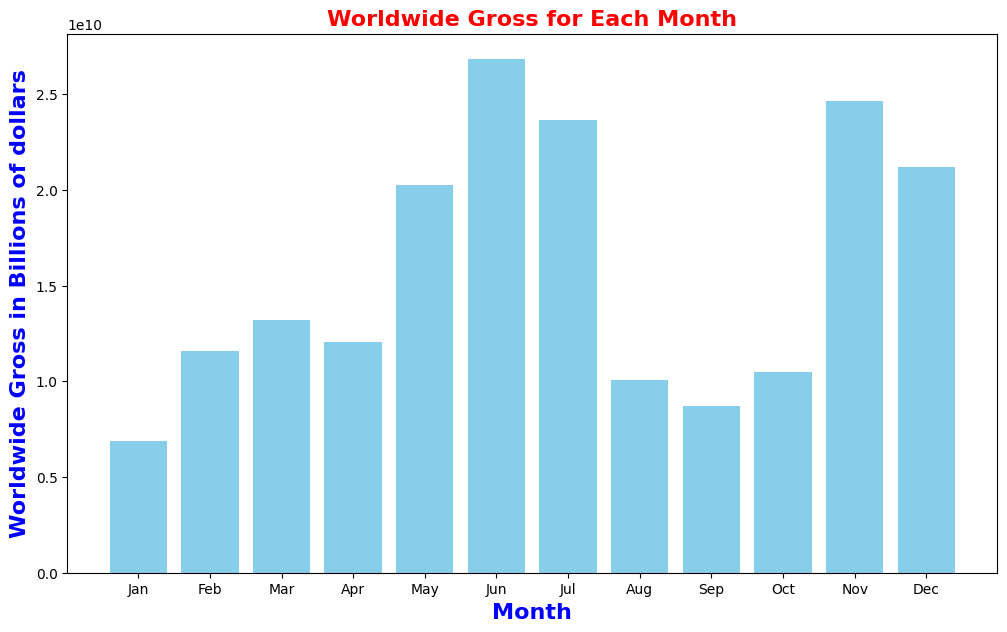

In [ ]:
# size of the graph
plt.figure(figsize=(12,7))
# define  the variables for  plotting

movies_data['release_date'] = pd.to_datetime(movies_data['release_date'])

movies_data['release_month'] = movies_data['release_date'].dt.month


monthly_gross = movies_data.groupby('release_month')['worldwide_gross($)'].sum()

# Plot monthly bar graph
plt.bar(monthly_gross.index, monthly_gross.values, color='skyblue')
# Adding labels and title
plt.xlabel('Month', fontsize=16, color='blue', fontweight='bold')
plt.ylabel('Worldwide Gross in Billions of dollars', fontsize=16, color='blue', fontweight='bold')
plt.title('Worldwide Gross for Each Month',fontsize=16, color='red', fontweight='bold')
plt.xticks(range(1, 13), [pd.to_datetime(str(i), format='%m').strftime('%b') for i in range(1, 13)]) 

# Display the plot
plt.show()

## Insight:
### The timing of movie releases significantly impacts box office success. Movies released during peak months and strategically tied to holidays demonstrate higher audience engagement.

## Recommendation:
### Develop a strategic release calendar, aligning movie releases with peak months and holidays to maximize audience reach and enhance box office returns.

# 3. Global vs. Domestic Trends:
### I evaluated the performance of films in domestic and foreign markets separately to tailor strategies for different audience preferences.


In [ ]:
### grouping by worldwide_gross and domestic_gross
trends = movies_data.groupby(['title', 'foreign_gross', 'domestic_gross'])
trends.first()

,,,Unnamed: 0,studio,year,id,release_date,movie,production_budget($),worldwide_gross($),Genre,release_month
title,foreign_gross,domestic_gross,,,,,,,,,,
10 Cloverfield Lane,38100000,72100000.0,962,Par.,2016,54,2016-03-11,10 Cloverfield Lane,5000000,108286422,Unknown,3
12 Strong,21600000,45800000.0,1208,WB,2018,64,2018-01-19,12 Strong,35000000,71118378,Unknown,1
12 Years a Slave,131100000,56700000.0,532,FoxS,2013,18,2013-10-18,12 Years a Slave,20000000,181025343,Unknown,10
127 Hours,42400000,18300000.0,75,FoxS,2010,6,2010-11-05,127 Hours,18000000,60217171,Unknown,11
13 Hours: The Secret Soldiers of Benghazi,16600000,52900000.0,979,Par.,2016,30,2016-01-15,13 Hours: The Secret Soldiers of Benghazi,50000000,69411370,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Zookeeper,89500000,80400000.0,219,Sony,2011,71,2011-07-08,Zookeeper,80000000,170805525,Unknown,7
Zoolander 2,27900000,28800000.0,983,Par.,2016,64,2016-02-12,Zoolander 2,50000000,55348693,Unknown,2
Zootopia,682500000,341300000.0,913,BV,2016,57,2016-03-04,Zootopia,150000000,1019429616,Unknown,3


### comparison between domestic gross and foreign gross

In [ ]:
# sorting the dataset by domestic gross
domestic = movies_data.sort_values(by='domestic_gross', ascending=False)[['title', 'domestic_gross', 'foreign_gross']]
# top ten movies with the highest domestic gross
domestic.head(10)

,title,domestic_gross,foreign_gross
1155,Black Panther,700100000.0,646900000
1154,Avengers: Infinity War,678800000.0,"1,369.5"
764,Jurassic World,652300000.0,"1,019.4"
1157,Incredibles 2,608600000.0,634200000
911,Rogue One: A Star Wars Story,532200000.0,523900000
912,Finding Dory,486300000.0,542300000
766,Avengers: Age of Ultron,459000000.0,946400000
353,The Dark Knight Rises,448100000.0,636800000
500,The Hunger Games: Catching Fire,424700000.0,440300000
1156,Jurassic World: Fallen Kingdom,417700000.0,891800000


In [ ]:
# sorting the dataset by foreign gross
foreign = movies_data.sort_values(by='foreign_gross', ascending=False)[['title', 'foreign_gross', 'domestic_gross']]
# top 10 movies with the highest foreign gross
foreign.head(10)

,title,foreign_gross,domestic_gross
629,The East,99700,2300000.0
118,Sea Rex 3D: Journey to a Prehistoric World,9900000,6100000.0
309,Le Havre,9900000,612000.0
687,Heaven is for Real,9900000,91400000.0
617,Only God Forgives,9900000,779000.0
1178,Creed II,98300000,115700000.0
102,Splice,9800000,17000000.0
1087,The Post,97900000,81900000.0
216,War Horse,97700000,79900000.0
178,The Girl on the Train,97100,208000.0


### from the comparison we deduced that a lot of movies have more profitability locally than in foreign markets

## Recommendation
### Tailoring film strategies for global success involves cultural customization in marketing and content, ensuring language accessibility through subtitles or dubbing. Strategic marketing, leveraging local influencers, and timing releases with local events enhance audience engagement. Diverse distribution strategies, separate box office analyses, and adherence to local regulations contribute to success. Prioritizing diversity in casting and exploring streaming platform agreements complete a comprehensive approach. Adjusting budgets based on market demands ensures optimal allocation for each market.

# Additional Insights

## Market Share Analysis:
###  We Analyzed the market share of major studios to identify potential collaboration opportunities or areas where Microsoft's new studio can carve a niche.

In [ ]:
movies_sorted = movies_data.sort_values(by='worldwide_gross($)', ascending=False)[['title', 'worldwide_gross($)', 'studio']]
movies_sorted

,title,worldwide_gross($),studio
1154,Avengers: Infinity War,2048134200,BV
764,Jurassic World,1648854864,Uni.
765,Furious 7,1518722794,Uni.
766,Avengers: Age of Ultron,1403013963,BV
1155,Black Panther,1348258224,BV
...,...,...,...
909,Skin Trade,1242,Magn.
904,Eden,0,BG
586,Snitch,0,LG/S
311,Point Blank,0,Magn.


## visualizations for market share analysis

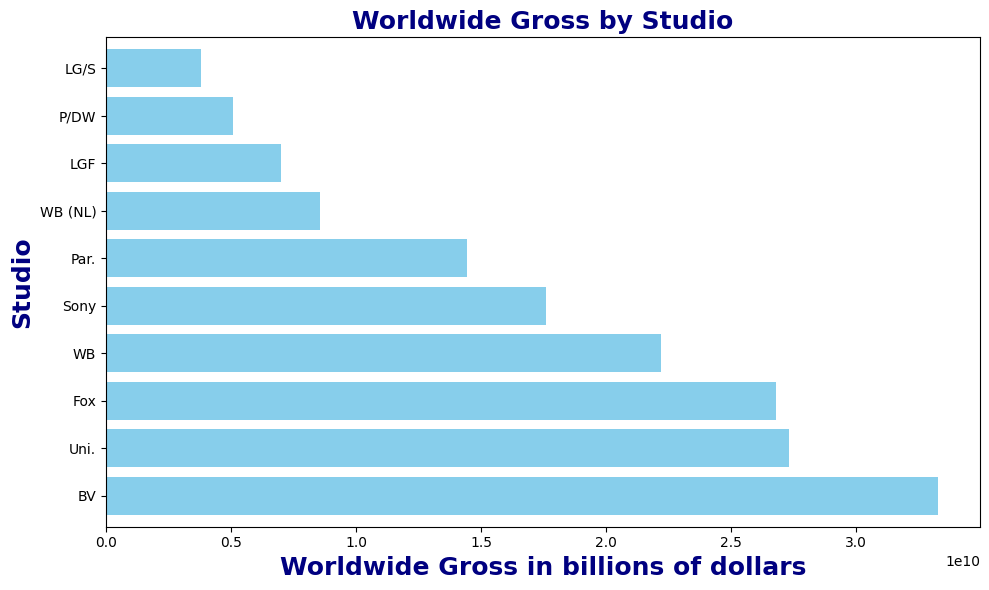

In [ ]:
# plotting a bar graph for worldwide gross by the first ten studios with the highest worldwide gross
studio_gross = movies_data.groupby('studio')['worldwide_gross($)'].sum().sort_values(ascending=False).head(10)

# Plotting the horizontal bar graph with adjusted bar width
plt.figure(figsize=(10, 6))
studio_gross.plot(kind='barh', color='skyblue', width=0.8)  # Adjust width as needed
# Adding labels and title
plt.xlabel('Worldwide Gross in billions of dollars',color='navy', fontsize=18, fontweight='bold')
plt.ylabel('Studio',color='navy', fontsize=18, fontweight='bold')
plt.title('Worldwide Gross by Studio', color='navy', fontsize=18, fontweight='bold')
plt.tight_layout()  # Automatically adjusts subplot parameters to avoid clipping x-axis labels

# Display the plot
plt.show()

## Insight:
### Microsoft's new movie studio should collaborate with industry giants like Universal, BV, and Fox to tap into their expertise and resources. These strategic partnerships can foster creativity, co-productions, and cross-platform projects, elevating Microsoft's presence and impact in the entertainment industry.

# Conclusion:
### In conclusion, Microsoft's new movie studio should focus on creating content within the Action, Adventure, and Animation genres to capitalize on current market trends. Additionally, adopting a balanced budgeting strategy, with an emphasis on mid-budget productions, will contribute to sustained profitability. Lastly, strategic release planning aligned with peak months and holidays will enhance the overall success of Microsoft's films. By incorporating these insights, Microsoft can confidently enter the movie industry and establish a strong presence in the competitive market.